In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

### Задание 1

In [2]:
from sklearn.datasets import load_boston

In [3]:
print('Keys:', *load_boston().keys(), sep='\n - ')

Keys:
 - data
 - target
 - feature_names
 - DESCR
 - filename


In [4]:
X = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)

X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
y = pd.DataFrame(load_boston().target, columns=['price'])

y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=load_boston().feature_names)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=load_boston().feature_names)

In [11]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
X_train_scaled.describe().round(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000
std,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240,1.001240
min,-0.406141,-0.500320,-1.487791,-0.278089,-1.458711,-3.461733,-2.348206,-1.258391,-0.974048,-1.307684,-2.568944,-3.892249,-1.510559
25%,-0.397976,-0.500320,-0.850273,-0.278089,-0.888783,-0.600349,-0.822826,-0.808198,-0.624360,-0.753356,-0.682101,0.209880,-0.800506
50%,-0.377675,-0.500320,-0.352167,-0.278089,-0.157233,-0.149443,0.327020,-0.297120,-0.507797,-0.446066,0.171470,0.383001,-0.215776
75%,-0.045821,0.364589,1.033237,-0.278089,0.633861,0.452824,0.897473,0.748198,0.308141,1.578434,0.845343,0.431660,0.551307
max,9.630689,3.824227,2.433163,3.595975,2.675394,3.477564,1.124581,3.907900,1.706891,1.849573,1.653990,0.444180,3.592534


In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

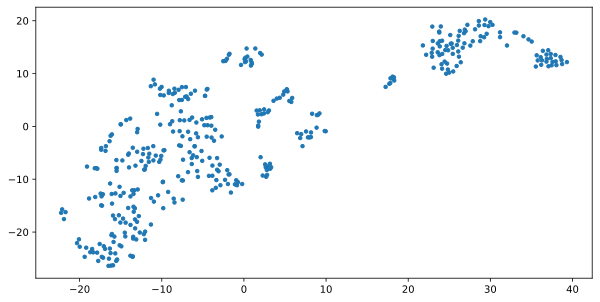

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], s=12)

plt.show()

### Задание 2

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

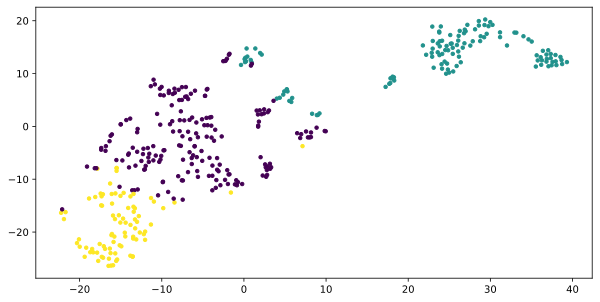

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], s=12, c=labels_train)

plt.show()

In [19]:
for i in range(0, 3):
    print(f'Price in {i + 1} cluster =', *y_train[labels_train == i].mean().round(4), '\t|',
          f'CRIM feature in {i + 1} cluster =', X_train[labels_train == i]['CRIM'].mean().round(4))
print('Average price =', *y_train.mean().round(4), '\t|', 
      'Average CRIM feature =', X_train['CRIM'].mean().round(4))

Price in 1 cluster = 24.9581 	| CRIM feature in 1 cluster = 0.4217
Price in 2 cluster = 16.1654 	| CRIM feature in 2 cluster = 10.797
Price in 3 cluster = 27.7884 	| CRIM feature in 3 cluster = 0.0736
Average price = 22.7965 	| Average CRIM feature = 3.6091


### Задание 3

In [20]:
labels_test = kmeans.predict(X_test_scaled)

pd.value_counts(labels_test)

0    51
1    35
2    16
dtype: int64

In [21]:
for i in range(0, 3):
    print(f'Price in {i + 1} cluster =', *y_test[labels_test == i].mean().round(4), '\t|',
          f'CRIM feature in {i + 1} cluster =', X_test[labels_test == i]['CRIM'].mean().round(4))
print('Average price =', *y_test.mean().round(4), '\t|', 
      'Average CRIM feature =', X_test['CRIM'].mean().round(4))

Price in 1 cluster = 21.8608 	| CRIM feature in 1 cluster = 0.2661
Price in 2 cluster = 16.4371 	| CRIM feature in 2 cluster = 10.1655
Price in 3 cluster = 31.35 	| CRIM feature in 3 cluster = 0.0621
Average price = 21.4882 	| Average CRIM feature = 3.6309
